# 数据类型与模型类型

机器学习当中有两类数据类型和机器学习模型：

- 有监督：数据存在着目标
- 无监督：数据不存在着目标，只有标签

有监督问题比无监督问题更容易解决。我们需要预测一个值的问题被称为有监督问题。

一个有监督学习的图示：

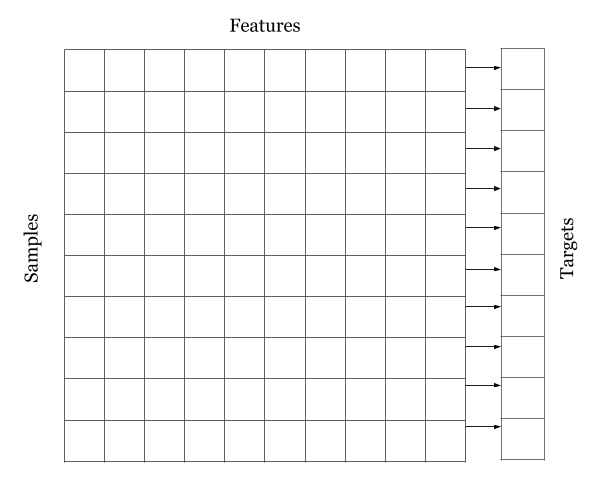

上述图片中：
- 竖着的是Features，也就是每个样本的特征，即每个样本的属性
- Samples则是每个样本
- Targets则是样本属性中我们关注的部分，比如说：房价，类型等等

目标变量有两种情况：数值，类型。

所以机器学习模型也有两种：
- 回归模型：通过特征来预测具体的值
- 分类模型：通过特征来预测类别

有时我们可能会在分类设置中使用回归，这取决于用于评估的指标。

另一种机器学习问题是无监督类型。无监督数据集没有与之相关的目标，一般来说，与有监督问题相比，处理无监督数据集更具挑战性。

一个例子：

> 假设你在一家处理信用卡交易的金融公司工作。每秒钟都有大量数据涌入。唯一的问题是，很难找到一个人来将每笔交易标记为有效交易、真实交易或欺诈交易。当我们没有任何关于交易是欺诈还是真实的信息时，问题就变成了无监督问题。

要解决这个问题：需要考虑将数据分为多少个聚类（簇），聚类是解决这类问题的方法之一，但是不是唯一的方法。

这是一个图示：

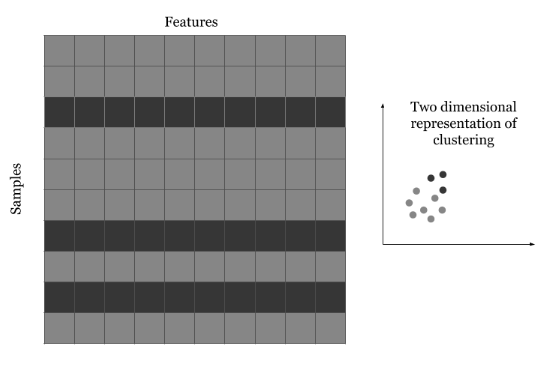

假设数据可以被表示为两个类别：深色和浅色，深色表示的是欺诈，浅色表示的是真实交易。

可以使用的一些技术：
- 主成分分析（PCA）：PCA技术是一种统计方法，用于通过正交变换将一组可能相关的变量转换为一组线性不相关的变量，称为主成分。
- t-分布随机邻域嵌入（t-SNE）：t-SNE是一种非线性降维技术，用于在二维或三维的低维空间中表示高维数据集，从而使其可视化。

有监督学习比无监督学习更好解决，因为更容易被评估，但是对无监督学习算法的结果进行评估具有挑战性，因为需要人为的干预或者启发式的方法。

# 数据集

通常情况下，人们开始学习数据科学或者机器学习时，都会从非常著名的数据集开始，例如：泰坦尼克号，鸢尾花等等。

无监督学习数据集则包括了客户细分的数据集，比如说，对网站的访客数据进行聚类，从而判断出不同类型的访客来方便之后的研究。

大部分情况之下，可以将有监督学习转换为无监督学习，然后进行可视化，查看绘制的结果，从而获取一些有意义的判断。

一个非常著名的数据集：手写数字数据集。

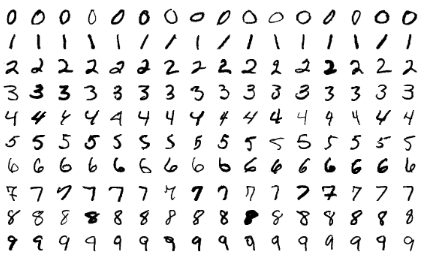

如果使用t-SNE来进行分解，那么当图像的像素降维到2个维度的时候，就可以在一定程度上分离图像：

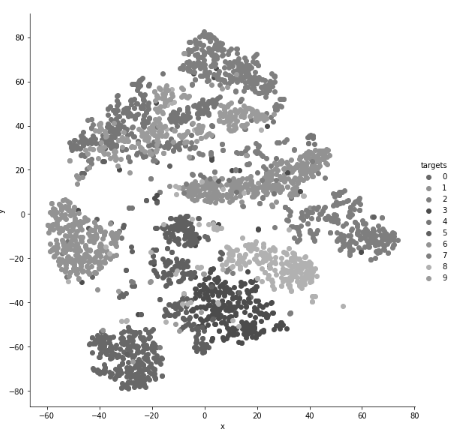

这是实现的方法：

In [8]:
# 导入所有需要的库
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [9]:
# 下载数据集
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

在这部分代码中，我们使用 sklearn 数据集获取了数据，并获得了一个像素值数组和另一个目标数组。由于目标是字符串类型，我们将其转换为整数。

pixel_values 是一个形状为 70000x784 的二维数组。 共有 70000 张不同的图像，每张图像大小为 28x28 像素。平铺 28x28 后得到 784 个数据点。

我们可以将数据集中的样本重塑为原来的形状，然后使用matplotlib来绘制成图表：

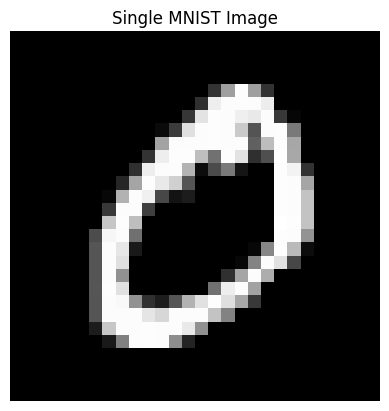

In [36]:
# 提取数据集中的单个图像（例如第2个样本）
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)

# 显示图像，使用灰度颜色映射
plt.imshow(single_image, cmap='gray')
plt.title("Single MNIST Image")
plt.axis('off')  # 隐藏坐标轴
plt.show()

需要注意，书中使用的是：
```python
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')
```

但是，因为pixel_values的类型为：pd.dataframe，所以需要使用iloc。

In [37]:
pixel_values.iloc[1, :]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 1, Length: 784, dtype: int64

在`pandas`中，`.iloc`是一个基于整数位置的索引方法，它允许你通过行号和列号来选择数据。`.iloc`的参数如下：

- 第一个参数（行选择）：这个参数指定了你想要选择的行的位置。它可以是一个整数，一个整数列表，一个整数切片，或者一个布尔数组。如果你只提供一个参数，它将选择所有列。
- 第二个参数（列选择）：这个参数指定了你想要选择的列的位置。它也可以是一个整数，一个整数列表，一个整数切片，或者一个布尔数组。

最重要的步骤在我们获取数据之后：

In [41]:
tsne = manifold.TSNE(n_components = 2, random_state = 42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

C:\Users\wangjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


n_components = 2将高维数据降到2D平面，方便再二维图上进行可视化，random_state则确保了实验的可重复性。

pixel_values.iloc[:3000, :]则是选取了前3000个样本和其像素点，接着通过tsne.fit_transform()函数来进行了拟合。

t-SNE 是一种非线性降维方法，特别适合对高维数据进行可视化。目标是将数据嵌入到低维空间（通常是 2D 或 3D），尽可能保留高维空间中的局部相似性。

In [42]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),
                       columns=["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

在这里，我们从一个 numpy 数组创建一个 pandas 数据帧。x 和 y 是 t-SNE 分解的两个维度，target 是实际数字。这样我们就得到了如图 6 所示的数据帧。

In [43]:
tsne_df

,x,y,targets
0,20.276270,-11.373996,5.0
1,57.526806,-0.077877,0.0
2,-0.635003,-54.560963,4.0
3,-41.022923,11.359246,1.0
4,-10.339593,-33.171558,9.0
...,...,...,...
2995,-36.246044,-25.143169,7.0
2996,52.476883,-3.384054,0.0
2997,-30.989498,-13.174622,9.0
2998,-29.206312,45.753082,1.0


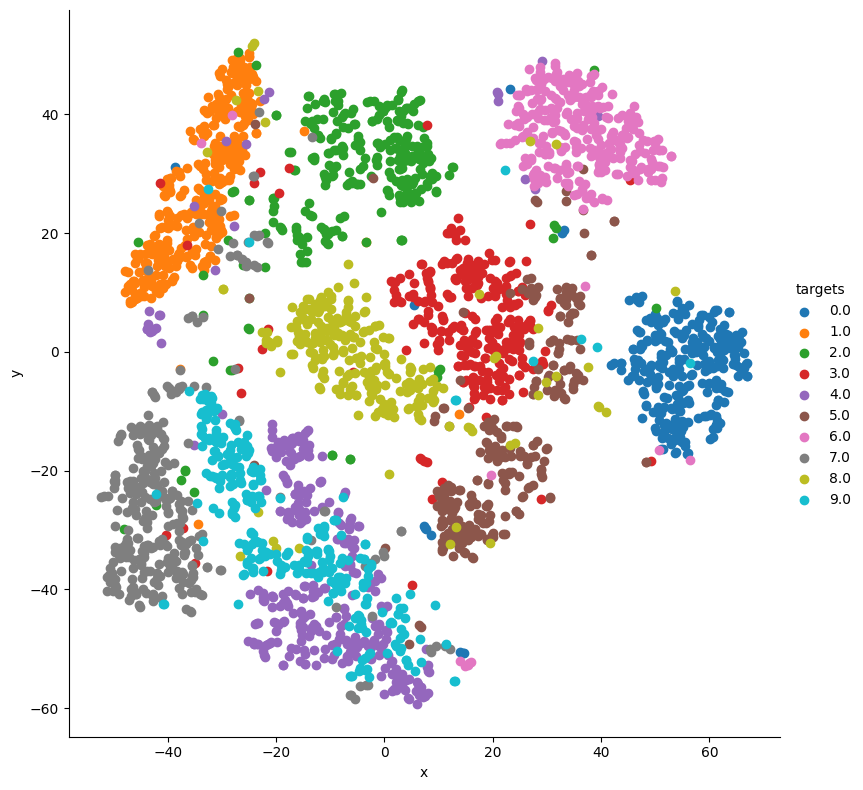

In [45]:
grid = sns.FacetGrid(tsne_df, hue = "targets", height = 8)
grid.map(plt.scatter, "x", "y").add_legend()

注意，原书的代码为：
```python
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()
```
size 参数在新版 seaborn 中已被移除或替代，这里改为 height = 8。

这是无监督数据集可视化的一种方法。我们还可以在同一数据集上进行 k-means 聚类，看看它在无监督环境下的表现如何。一个经常出现的问题是，如何在 k-means 聚类中找到最佳的簇数。这个问题没有正确答案。

MNIST 是一个有监督的分类问题，我们把它转换成一个无监督的问题，只是为了检查它是否能带来任何好的结果。

分类算法的效果其实会更好，这个在第二章里面会进行讲解。